In [1]:
import numpy as np
from tqdm import tqdm
import gr_pushers
from gr_pushers import grBoris, grGCA
import metrics
import matplotlib.pyplot as plt
from progiter import ProgIter

In [2]:
from scipy.optimize import fsolve
def getr_Kerr(a, E, L, M = 1):
    
    def rFunc(r):
        
        Delta = r**2 - 2 * M * r + a**2
        
        return Delta * (r**2 + (L - a * E)**2) - (E * (r**2 + a**2) - a * L)**2
    
    initial_guess = 10000
    return fsolve(rFunc, initial_guess)[0]

In [3]:
def E_kerr(x):
    return np.array([[0, 0, 0]])

def B_kerr(x):
    return np.array([[0, 0, 0]])

In [5]:
def x_Sph2Cart(x):
    """
    Converts from spherical to cartesian coordinates.

    Parameters
    ----------
    x : np.array (n x 3)
        contravariant coordinate x^i

    Returns
    -------
    np.array (n x 3)
        cartesian coordinate x^i
    """
    xcart = np.zeros(x.shape)
    xcart[:, 0] = x[:, 0] * np.sin(x[:, 1]) * np.cos(x[:, 2])
    xcart[:, 1] = x[:, 0] * np.sin(x[:, 1]) * np.sin(x[:, 2])
    xcart[:, 2] = x[:, 0] * np.cos(x[:, 1])
    return xcart

def x_Cart2Sph(x):
    """
    Converts from spherical to cartesian coordinates.

    Parameters
    ----------
    x : np.array (n x 3)
        contravariant coordinate x^i

    Returns
    -------
    np.array (n x 3)
        cartesian coordinate x^i
    """
    xsph = np.zeros(x.shape)
    
    xsph[:, 0] = np.sqrt(x[:, 0]**2 + x[:, 1]**2 + x[:, 2]**2)
    xsph[:, 1] = np.arccos(x[:, 2]/np.sqrt(x[:, 0]**2 + x[:, 1]**2 + x[:, 2]**2))
    xsph[:, 2] = np.arctan2(x[:, 1], x[:, 0])
    return xsph

In [9]:
getr_Kerr(a, E, L)

10.02153343690634

In [12]:
getr_Kerr(a, E, L)

34.20899756651591

In [11]:
#Kerr

E = 0.920250
L = 2
a = 0.995

r = getr_Kerr(a, E, L)

phot = False
start_over = True

dt = 1e-2
iters = int(1e5)

metric = metrics.Kerr_KS(a)
pusher = grBoris()

if start_over == False:
    itCount = len(posListTest)
    x = x_Cart2Sph(posListTest[-1])
    u = u_listTest[-1]
    iters -= itCount
    posListTest = list(posListTest)
    u_listTest = list(u_listTest)
    
else:
    itCount = 0
    x = np.array([[r, np.pi/2, 0]])
    x_old = np.copy(x)
    u = np.array([[(-a * L + 2 * r * E)/(a**2 + (-2 + r) * r), 0, L]])
    #u = np.array([[0, 0, L]])
    #u = np.einsum('nij,nj->ni', metric.h_ij(x[:,:-1]), u)
    #u = np.array([[0, 0, L]])
    posListTest = []
    u_listTest = []
    energy_list = []
    posListSph = []
    #xCart = x_Sph2Cart(x)
    #posListTest.append(xCart)

for i in tqdm(range(iters)):                                                                                                       
    
    x_old, x, u, energy, gamma = pusher.grBorisPush(metric, x_old, x, u, E_kerr, B_kerr, dt, phot)
    xCart = x_Sph2Cart(x)
    u_listTest.append(u)
    posListSph.append(x)
    posListTest.append(xCart)
    energy_list.append(energy)
    itCount += 1
    
posListTest = np.array(posListTest)
u_listTest = np.array(u_listTest)



100%|██████████████████████████████████| 100000/100000 [03:00<00:00, 552.49it/s]


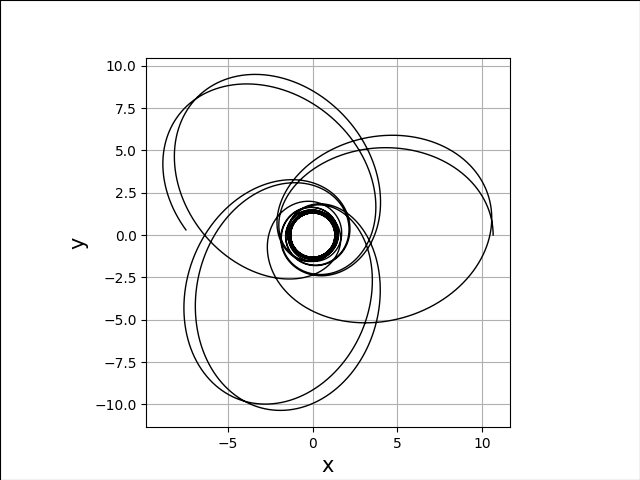

In [12]:
posListTest = np.array(posListTest)
end = -1
x = posListTest[:end, 0, 0]
y = posListTest[:end, 0, 1]
z = posListTest[:end, 0, 2]

    
%matplotlib widget
fig= plt.figure()

ax= fig.add_axes([0,0,1,1])

ax = plt.axes()

ax.plot(x, y, linewidth = 1, c = 'black')

ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)

ax.grid(True)
ax.set_aspect(1)
#ax.set(xlim = (-12, 12), ylim = (-12, 12))
plt.show()
#ax.view_init(1, 90, 0)

In [13]:
%%time
import importlib
importlib.reload(metrics)
importlib.reload(gr_pushers)
from gr_pushers import grBoris, grGCA

#Monopole with Minkowski
Om0 = 1e-1
#Om0 = 1e0
B0 = 1e3

def B_field(x):
    
    n = x.shape[0]
    
    Rs = 1
    r = x[:, 0]
    
    #n = 3
    
    Om = Om0 * np.array([1, 0, 0])
    v = x[:, 0] * Om[0] * np.sin(x[:, 1])
    Et = -v * (Rs / r)**2 * B0
    
    return np.array([B0 * (Rs / r)**2, np.zeros(n), Et]).T

def E_field(x):
    
    n = x.shape[0]
    
    Rs = 1
    r = x[:, 0]
    
    Om = Om0 * np.array([1, 0, 0])
    v = x[:, 0] * Om[0] * np.sin(x[:, 1])
    Et = -v * (Rs / r)**2 * B0
    
    return np.array([np.zeros(n), Et, np.zeros(n)]).T

phot = False
start_over = True

r0 = 2
dt = 1e-3
iters = int(2e5)
a = 0.0
q_over_m = 1

metric = metrics.Minkowski()
pusher = grGCA()

if start_over == False:
    itCount = len(pos_list)
    x = x_Cart2Sph(pos_list[-1])
    u = u_listTest[-1]
    iters -= itCount
    pos_list = list(pos_list)
    u_list = list(u_list)
    gam_list = list(gam_list)
    kap_list = list(kap_list)
    pos_sph_list = list(pos_sph_list)
    
else:
    itCount = 0
    x = np.array([[r0, np.pi/2, 0]])
    xold = np.copy(x)
    u = np.array([[0, 0, 0]])
    pos_list = []
    pos_sph_list = []
    u_list = []
    gam_list = []
    kap_list = []
    
    #xCart = x_Sph2Cart(x)
    #pos_list.append(xCart)
    #u_list.append(u)
    #pos_sph_list.append(x)
    

for i in ProgIter(range(iters)):                                                                                                       
    
    xold, x, u, gam, kap = pusher.grGCAPush(metric, xold, x, u, E_field, B_field, dt)
    xCart = x_Sph2Cart(x)
    u_list.append(u)
    pos_sph_list.append(x)
    pos_list.append(xCart)
    #energy_list.append(energy)
    gam_list.append(gam)
    kap_list.append(kap)
    itCount += 1

pos_list = np.array(pos_list)
pos_sph_list = np.array(pos_sph_list)
u_list = np.array(u_list)
gam_list = np.array(gam_list)
kap_list = np.array(kap_list)


 0.00%      0/200000... rate=0 Hz, eta=?, total=0:00:00

NameError: name 'u_i' is not defined